In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from numpy.lib.shape_base import dstack
from sklearn.model_selection import train_test_split
from math import sqrt

In [39]:
df = pd.read_csv('Employee_Salary_Compensation.csv')
dataset = df
Comp_cols = ['Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement', 'Health and Dental', 'Other Benefits', 'Total Benefits', 'Total Compensation']

# **Data Preprocessing**

We will drop the following columns from the dataset,

Redundant Columns: Organization Group Code, Job Family Code,Job Code,Department Code, Union Code - as these are categorical variables, retaining the Code will end up considering it as a numerical value thus affecting the mode. Insignificant Columns: Employee Identifier, Total Salary, Total Benefits

In [40]:
df.drop(['Organization Group Code','Job Family Code','Job Code','Department Code','Union Code','Total Salary','Total Benefits'],inplace=True,axis=1)
df.drop(['Employee Identifier'],axis=1,inplace=True)


In [41]:
df.isnull().sum()

Year Type               0
Year                    0
Organization Group      0
Department              2
Union                 179
Job Family              0
Job                     5
Salaries                0
Overtime                0
Other Salaries          0
Retirement              0
Health and Dental       0
Other Benefits          0
Total Compensation      0
dtype: int64

In [42]:
df[df['Organization Group'] == 'General City Responsibilities']['Department'].mode()
df['Department'].fillna('GEN General City / Unallocated',inplace=True)
df.isnull().sum()

Year Type               0
Year                    0
Organization Group      0
Department              0
Union                 179
Job Family              0
Job                     5
Salaries                0
Overtime                0
Other Salaries          0
Retirement              0
Health and Dental       0
Other Benefits          0
Total Compensation      0
dtype: int64

In [43]:
df[df['Organization Group']=='Culture & Recreation']['Union'].mode()
df['Union'].fillna('SEIU, Local 1021, Misc',inplace=True)
df[df['Job Family']=='Management']['Job'].mode()
df[df['Job Family']=='Dietary & Food']['Job'].mode()
df[df['Job Family']=='Park & Zoo']['Job'].mode()
pd.set_option('mode.chained_assignment','raise')
df.loc[197683,'Job'] = 'Manager II'
df.loc[535421,'Job'] = 'Manager II'
df.loc[577950,'Job'] = 'Manager II'
df.loc[542571,'Job'] = 'Food Service Worker'
df.loc[544862,'Job'] = 'Admission Attendant'
df.isnull().sum()


Year Type             0
Year                  0
Organization Group    0
Department            0
Union                 0
Job Family            0
Job                   0
Salaries              0
Overtime              0
Other Salaries        0
Retirement            0
Health and Dental     0
Other Benefits        0
Total Compensation    0
dtype: int64

In [44]:
index_names = df[(df['Salaries']<0) |  (df['Overtime']<0) | (df['Other Salaries']<0) | (df['Retirement']<0) | (df['Health and Dental']<0) | (df['Other Benefits']<0) | (df['Total Compensation']<0)].index
df.drop(index=index_names,inplace=True)
index_names = df[df['Total Compensation'] == 0].index
df.drop(index=index_names,inplace=True)



## **Encoding**

In [ ]:
# Using the LabelEncoder form Sklearn to label the categorical values.

In [45]:
encoder = LabelEncoder()
df = df.apply(encoder.fit_transform)
df.head()

,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,Total Compensation
0,0,0,5,2,87,23,593,201924,0,0,123709,109506,210071,223803
1,0,0,5,2,87,23,595,202563,0,0,108044,58422,219487,209695
2,0,0,5,2,87,23,617,229618,0,0,151435,132345,217172,253861
4,0,0,5,2,87,23,611,32675,0,0,15083,8301,27020,50249
5,0,0,5,2,87,23,609,131677,0,0,77660,32304,134406,155675


## **Using Sklearn Decision Tree Regressor**

In [74]:
# The dataset is split, the last feature that the total compensation is used as Y. And the rest of the columns are used as X.

In [75]:
# This section used the baseline decision tree regressor from sklearn.
# The minimun sample for a split is set to 100 and the depth is varied from 1 to 10.

In [46]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=41)
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 5)

In [47]:
depths = []
MSE = []
scores = []
for depth in  range(1,11):
  dtr = DecisionTreeRegressor(max_depth = depth, min_samples_split=100)
  dtr.fit(X_train, Y_train)
  y_pred = dtr.predict(X_test)
  mse = mean_squared_error(Y_test,y_pred)
  mae = mean_absolute_error(Y_test,y_pred)
  rmse = sqrt(mse)
  r2Score = r2_score(Y_test,y_pred)
  depths.append(depth)
  MSE.append(mse)
  scores.append(r2Score)
  print("----------------------------------------------------------------------------------------------------------")
  print("Depth : " + str(depth))
  print("Decision Tree Regression")
  print("Mean Square Error:",mse,"\nRoot mean Square Error:",rmse,"\nMean Absolute Error",mae,"\nR sq value:",r2Score)


----------------------------------------------------------------------------------------------------------
Depth : 1
Decision Tree Regression
Mean Square Error: 10357543182.104027 
Root mean Square Error: 101772.01571210047 
Mean Absolute Error 86473.82902797194 
R sq value: 0.7157626736893592
----------------------------------------------------------------------------------------------------------
Depth : 2
Decision Tree Regression
Mean Square Error: 3573253794.365164 
Root mean Square Error: 59776.69942682653 
Mean Absolute Error 48419.929813037816 
R sq value: 0.9019408283525604
----------------------------------------------------------------------------------------------------------
Depth : 3
Decision Tree Regression
Mean Square Error: 1932327091.3397505 
Root mean Square Error: 43958.24258702514 
Mean Absolute Error 32886.874736828846 
R sq value: 0.9469720303026093
----------------------------------------------------------------------------------------------------------
Depth : 4

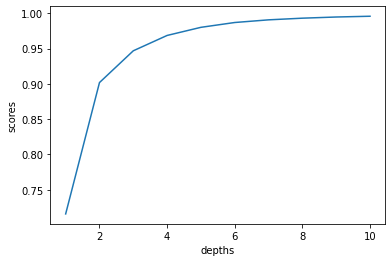

In [48]:
plt.plot(depths, scores )
plt.xlabel("depths")
plt.ylabel("scores")
plt.show()

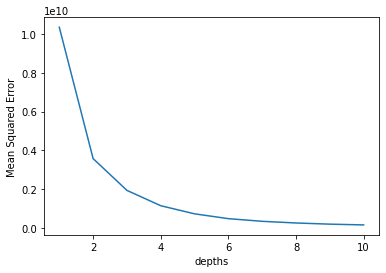

In [49]:
plt.plot(depths, MSE )
plt.xlabel("depths")
plt.ylabel("Mean Squared Error")
plt.show()

## **Node Class**

In [76]:
# Node class for the Decision Tree. It contains value of the node, its left child, right child, the index of the feature used, threshold and the information gain.

In [50]:
class Node():
    def __init__(self, i_feature=None, th=None, left=None, right=None, info_gain=None, value=None):
        self.value = value
        self.left = left
        self.right = right
        self.i_feature = i_feature
        self.th = th
        self.info_gain = info_gain

## **Decision Tree Regressor**

In [77]:
class DecisionTreeRegressor():
  # Initialize root, minimun samples for split ( default is 100 ) and maximun depth ( default = 5)
    def __init__(self, min_samples=100, max_depth=5):
        self.root = None
        self.min_samples = min_samples
        self.max_depth = max_depth
  # Build a tree give the training data.
    def tree_builder(self, ds, curr_depth=0):
        split_ = {}
        X, Y = ds[:,:-1], ds[:,-1]
        n_samples, n_features = np.shape(X)
        # splits until  number of samples is less than the min_samples or untill the max_depth is not reached.
        if n_samples>=self.min_samples and curr_depth<=self.max_depth:
            split_ = self.best_split(ds, n_samples, n_features)
            
            if split_["info_gain"]>0:
              # Recursive called to build left and right subtrees.
                l_tree = self.tree_builder(split_["ds_left"], curr_depth+1)
                r_tree = self.tree_builder(split_["ds_right"], curr_depth+1)
                return Node(split_["i_feature"], split_["th"],
                            l_tree, r_tree, split_["info_gain"])

        leaf_value = np.mean(Y)
        return Node(value=leaf_value)

    def best_split(self, ds, n_samples, n_features):
        split_ = {}
        max_info_gain = -float("inf")
        # Iterate through every feature and iterate through every unique value for that feature and calculate the information gain
        # Choose the max_information gain and return the best_split
        for i_feature in range(n_features):
            feature_values = ds[:, i_feature]
            possible_ths = np.unique(feature_values)
            for th in possible_ths:
                ds_left, ds_right = np.array([row for row in ds if row[i_feature]<=th]) , np.array([row for row in ds if row[i_feature]>th])
                if len(ds_left)>0 and len(ds_right)>0:
                    y, left_y, right_y = ds[:, -1], ds_left[:, -1], ds_right[:, -1]
                    # compute information gain
                    left_w = len(left_y) / len(y)
                    right_w = len(right_y) / len(y)
                    curr_info_gain =  np.var(y) - (left_w * np.var(left_y) + right_w * np.var(right_y))
                    if curr_info_gain>max_info_gain:
                        split_["ds_left"] = ds_left
                        split_["ds_right"] = ds_right
                        split_["i_feature"] = i_feature
                        split_["th"] = th
                        split_["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain

        # return best split
        return split_
  # Fit method calls the tree_builder
    def fit(self, X, Y):
        ds = np.concatenate((X, Y), axis=1)
        self.root = self.tree_builder(ds)
  
  
  
  
  # Used to make prediction on test data.
    def prediction(self, x, tree):
        if tree.value!=None: return tree.value
        feature_val = x[tree.i_feature]
        if feature_val<=tree.th:
            return self.prediction(x, tree.left)
        else:
            return self.prediction(x, tree.right)

    def predict(self, X):
        preditions = [self.prediction(x, self.root) for x in X]
        return preditions
    

In [68]:
X = df.iloc[:4000,:-1].values
Y = df.iloc[:4000, -1].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=41)

In [69]:
print(X.shape, Y.shape)

(4000, 13) (4000, 1)


Calculate Mean squared error, mean absolute error, root mean squared error and r2score for depth 1 to 10.
Note: Data used is on 4000 entries, this is because training on the whole training data set takes a very long time. 

In [70]:
depths = []
MSE = []
scores = []
for depth in  range(1,11):
  dtr = DecisionTreeRegressor(max_depth = depth)
  dtr.fit(X_train, Y_train)
  y_pred = dtr.predict(X_test)
  mse = mean_squared_error(Y_test,y_pred)
  mae = mean_absolute_error(Y_test,y_pred)
  rmse = sqrt(mse)
  r2Score = r2_score(Y_test,y_pred)
  depths.append(depth)
  MSE.append(mse)
  scores.append(r2Score)
  print("----------------------------------------------------------------------------------------------------------")
  print("Depth : " + str(depth))
  print("Decision Tree Regression")
  print("Mean Square Error:",mse,"\nRoot mean Square Error:",rmse,"\nMean Absolute Error",mae,"\nR sq value:",r2Score)


----------------------------------------------------------------------------------------------------------
Depth : 1
Decision Tree Regression
Mean Square Error: 2965392133.372024 
Root mean Square Error: 54455.41417868405 
Mean Absolute Error 42492.91410682097 
R sq value: 0.9166424832013067
----------------------------------------------------------------------------------------------------------
Depth : 2
Decision Tree Regression
Mean Square Error: 1684076488.9114518 
Root mean Square Error: 41037.50100714531 
Mean Absolute Error 29914.114746175695 
R sq value: 0.9526604145755622
----------------------------------------------------------------------------------------------------------
Depth : 3
Decision Tree Regression
Mean Square Error: 1047878640.0346987 
Root mean Square Error: 32370.95364728538 
Mean Absolute Error 21276.972189026896 
R sq value: 0.9705440098944492
----------------------------------------------------------------------------------------------------------
Depth : 4


Plot Depths vs R2Score 

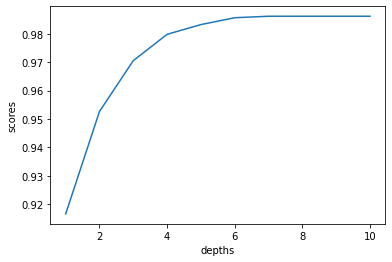

In [71]:
plt.plot(depths, scores )
plt.xlabel("depths")
plt.ylabel("scores")
plt.show()

Plot Depths vs Mean Squared Error 

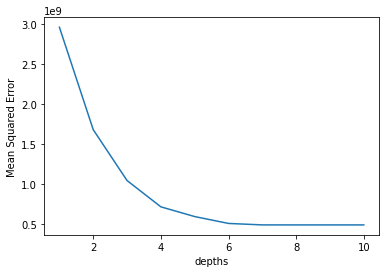

In [72]:
plt.plot(depths, MSE )
plt.xlabel("depths")
plt.ylabel("Mean Squared Error")
plt.show()

## **Evaluation on total data**

Calculate Mean squared error, mean absolute error, root mean squared error and r2score for depth 1 to 10.

In [ ]:
X = df.iloc[:,:-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=41)

In [ ]:
depths = []
MSE = []
scores = []
for depth in  range(1,11):
  dtr = DecisionTreeRegressor(max_depth = depth)
  dtr.fit(X_train, Y_train)
  y_pred = dtr.predict(X_test)
  mse = mean_squared_error(Y_test,y_pred)
  mae = mean_absolute_error(Y_test,y_pred)
  rmse = sqrt(mse)
  r2Score = r2_score(Y_test,y_pred)
  depths.append(depth)
  MSE.append(mse)
  scores.append(r2Score)
  print("----------------------------------------------------------------------------------------------------------")
  print("Depth : " + str(depth))
  print("Decision Tree Regression")
  print("Mean Square Error:",mse,"\nRoot mean Square Error:",rmse,"\nMean Absolute Error",mae,"\nR sq value:",r2Score)


----------------------------------------------------------------------------------------------------------
Depth : 1
Decision Tree Regression
Mean Square Error: 835701.7983508782 
Root mean Square Error: 914.1672704439151 
Mean Absolute Error 722.8251906257955 
R sq value: 0.8772882057410759
----------------------------------------------------------------------------------------------------------
Depth : 2
Decision Tree Regression
Mean Square Error: 498386.3878596095 
Root mean Square Error: 705.9648630488698 
Mean Absolute Error 546.7109729497718 
R sq value: 0.9268185278419145
----------------------------------------------------------------------------------------------------------
Depth : 3
Decision Tree Regression
Mean Square Error: 239445.7002559461 
Root mean Square Error: 489.33189172170876 
Mean Absolute Error 375.71480966903437 
R sq value: 0.9648405548917403
----------------------------------------------------------------------------------------------------------
Depth : 4
De

Plot Depths vs R2Score 

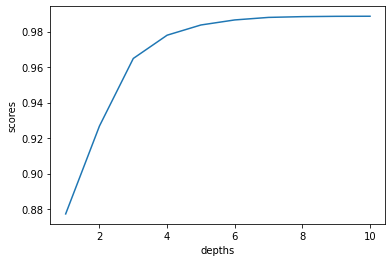

In [ ]:
plt.plot(depths, scores )
plt.xlabel("depths")
plt.ylabel("scores")
plt.show()

Plot Depths vs Mean Squared Error

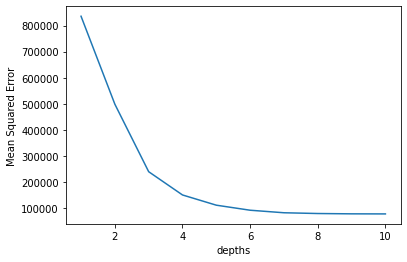

In [ ]:
plt.plot(depths, MSE )
plt.xlabel("depths")
plt.ylabel("Mean Squared Error")
plt.show()